# Sepsis Prediction

Sepsis is the body's severe reaction to infection. It's a life-threatening medical emergency. Sepsis occurs when an existing infection sets off a chain reaction that spreads throughout the body. Most cases of sepsis begin before a patient enters the hospital. Sepsis-causing infections typically begin in the lung, urinary tract, skin, or gastrointestinal tract. Without prompt treatment, sepsis can quickly cause tissue damage, organ failure, and death.

# BUSINESS UNDERSTANDING

Recognizing the vital need of early identification and action in sepsis, a life-threatening illness, this project aims to use machine learning and a predictive API deployment to provide healthcare practitioners with a tool to detect at-risk patients. 


## Dataset Overview
The sepsis dataset comprises patient records with comprehensive clinical features, including:

- **ID**: Unique patient identification number.
- **PRG**: Plasma glucose level.
- **PL**: Blood work result 1 (mu U/ml).
- **PR**: Blood pressure (mm Hg).
- **SK**: Blood work result 2 (mm).
- **TS**: Blood work result 3 (mu U/ml).
- **M11**: Body mass index (weight in kg/(height in m)²).
- **BD2**: Blood work result 4 (mu U/ml).
- **Age**: Patient’s age (years).
- **Insurance**: Indication of whether the patient holds a valid insurance card.
- **Sepsis**: Classification indicating whether the patient has sepsis (Positive) or not (Negative).

# Analytical Questions

1.  How are the numerical variables correlated with each other?
2.  What is the distribution of ages in the dataset?
3.  How many patients have insurance?
4. How does insurance status relate to the occurrence of Sepsis?
5. How does Pregnancy (PRG) vary with Sepsis?
6. What is the distribution of plasma glucose concentration in the dataset?
7. How does serum insulin (M11) vary between patients with and without sepsis?

##             HYPOTHESIS

* Null Hypothesis (H0): There is no association between having insurance and the occurrence of sepsis.
* Alternative Hypothesis (H1): There is an association between having insurance and the occurrence of sepsis.

In [1]:
# load necessay packages
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier
from scipy.stats import chi2_contingency
import joblib
import os



# visualization
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
data = pd.read_csv("datasets/Paitients_Files_Train 1.csv")

#preview data
data

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/Paitients_Files_Train 1.csv'

In [ ]:
# set index to a specific column
data.set_index('ID', inplace=True)

data

PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
ID                                                                     
ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
...        ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

[599 rows x 10 columns]

### DATA UNDERSTANDING

In [ ]:
data.describe()

PRG          PL          PR          SK          TS         M11  \
count  599.000000  599.000000  599.000000  599.000000  599.000000  599.000000   
mean     3.824708  120.153589   68.732888   20.562604   79.460768   31.920033   
std      3.362839   32.682364   19.335675   16.017622  116.576176    8.008227   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   64.000000    0.000000    0.000000   27.100000   
50%      3.000000  116.000000   70.000000   23.000000   36.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  123.500000   36.550000   
max     17.000000  198.000000  122.000000   99.000000  846.000000   67.100000   

              BD2         Age   Insurance  
count  599.000000  599.000000  599.000000  
mean     0.481187   33.290484    0.686144  
std      0.337552   11.828446    0.464447  
min      0.078000   21.000000    0.000000  
25%      0.248000   24.000000    0.000000  
50%      0.383000   29.000000    1.000000  
75%      0.647000   40.000000    1.000000  
max      2.420000   81.000000    1.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, ICU200010 to ICU200608
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 51.5+ KB


In [ ]:
# check for null values
data.isnull().sum()

PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

There are no null values in the dataset

In [ ]:
# check for duplicates
data.duplicated().sum()

0

# Univariate Analysis

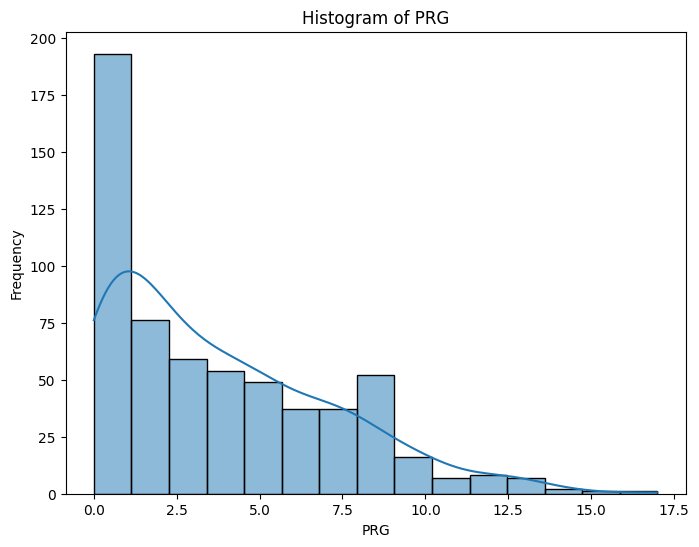

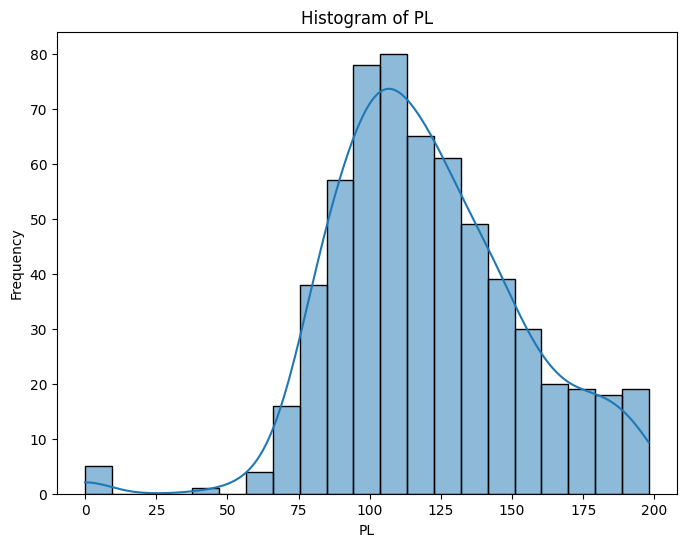

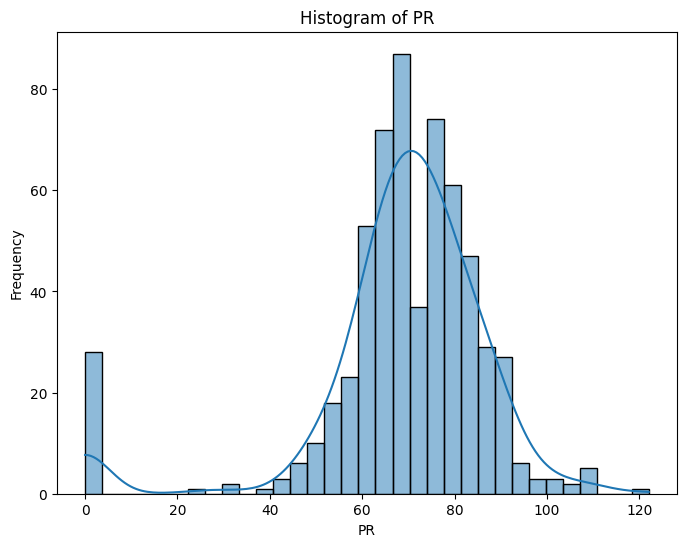

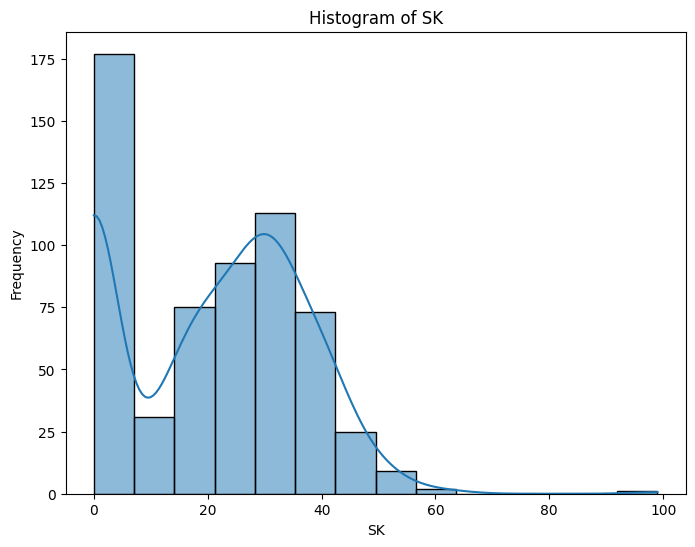

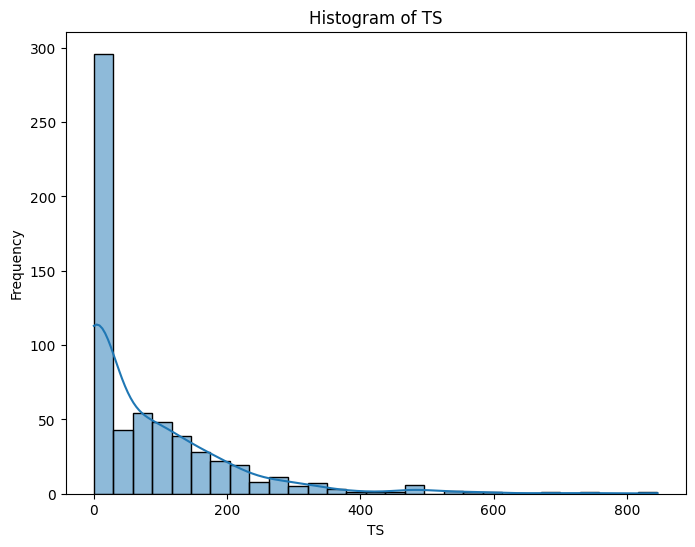

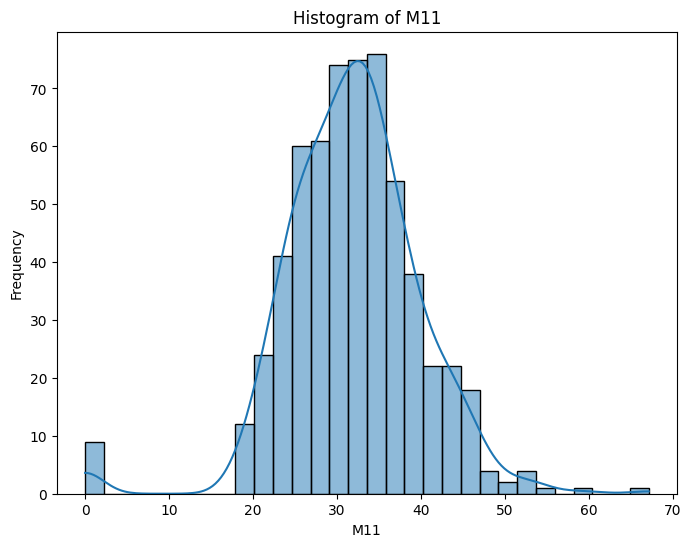

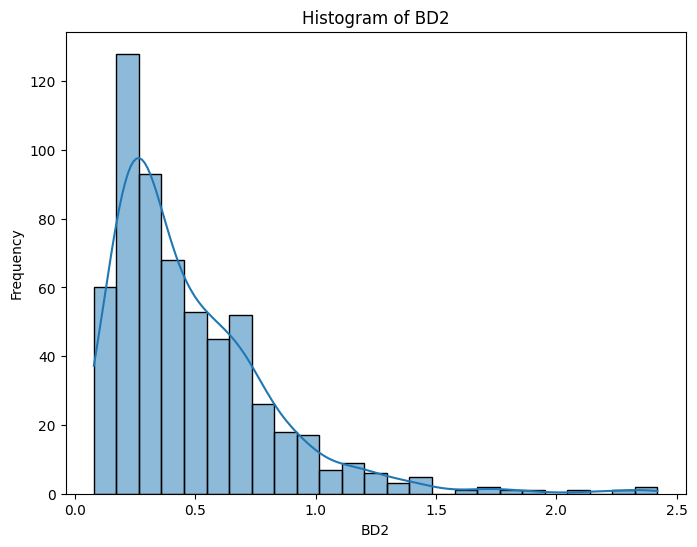

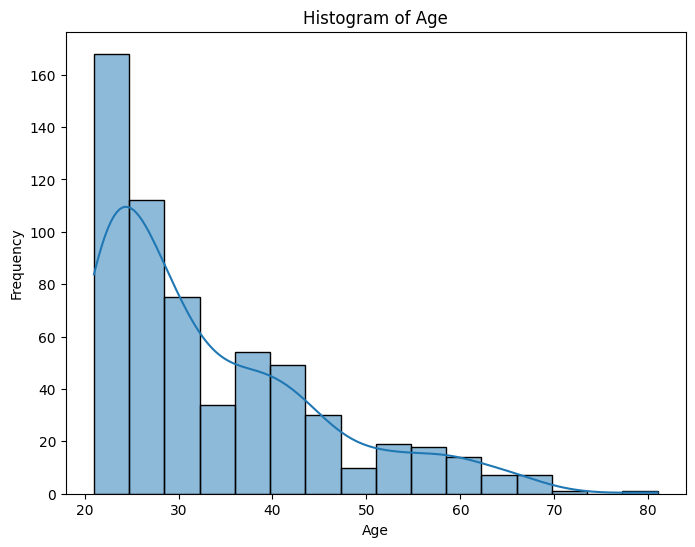

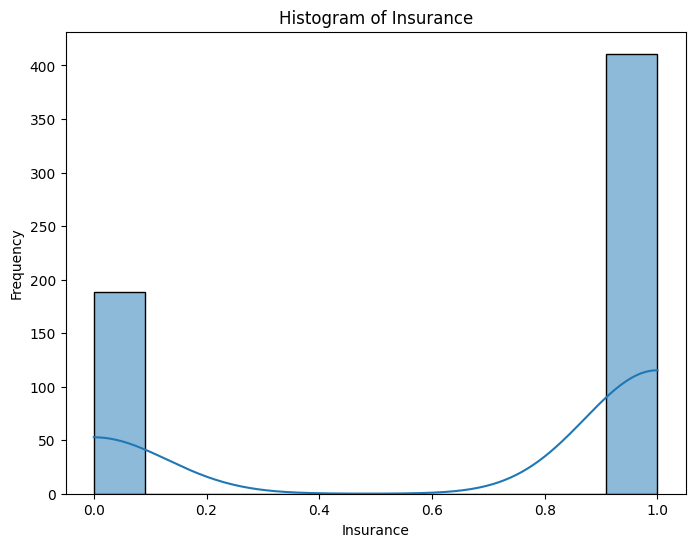

In [ ]:
# Histograms
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

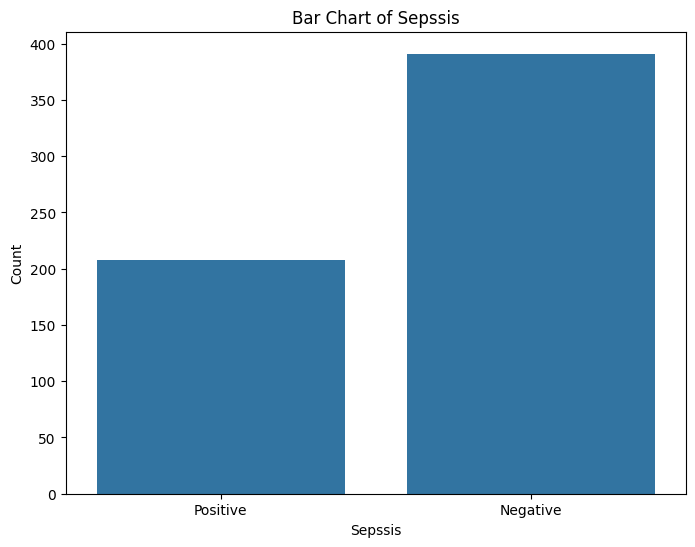

In [ ]:

# Bar Charts (for categorical variables)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

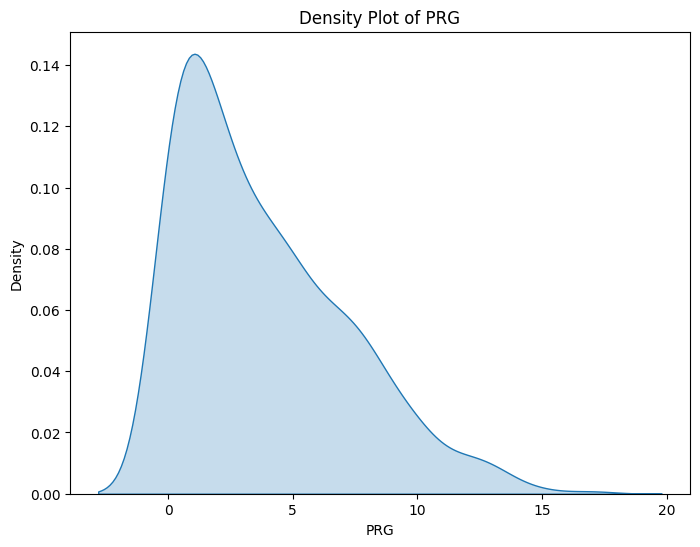

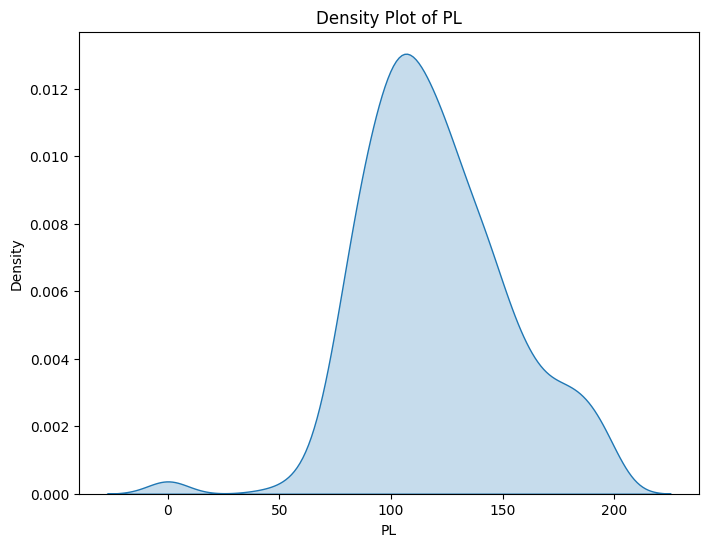

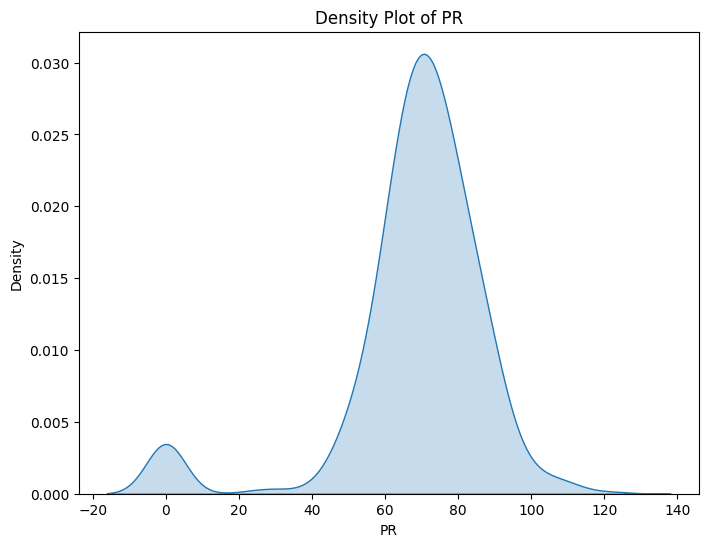

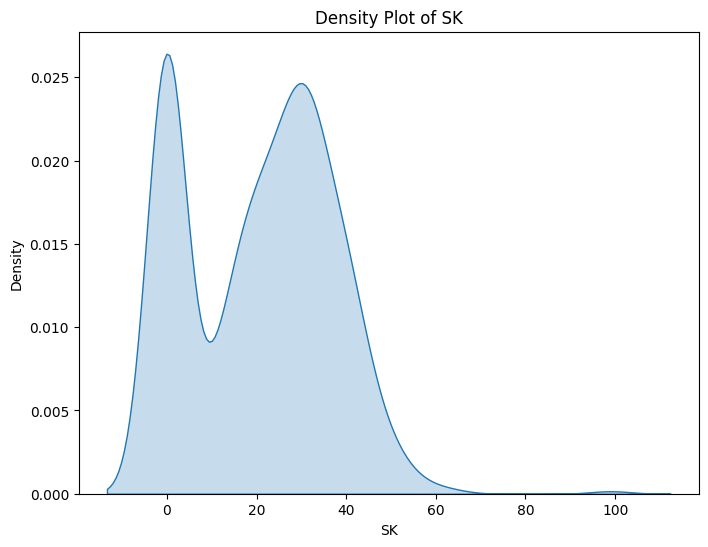

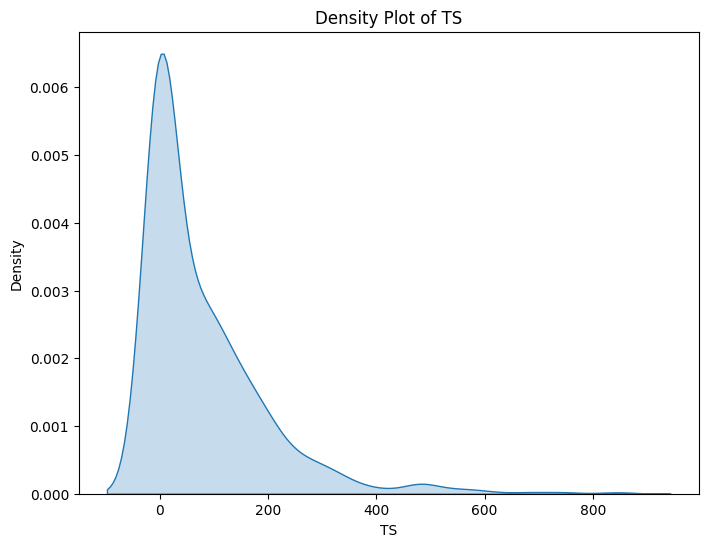

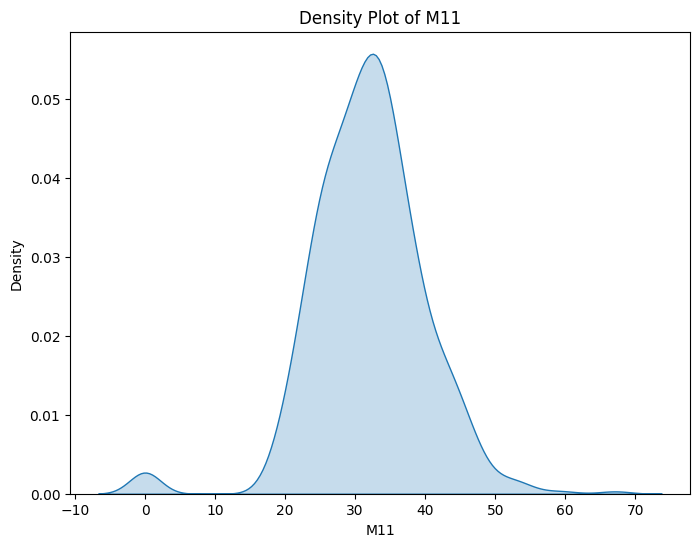

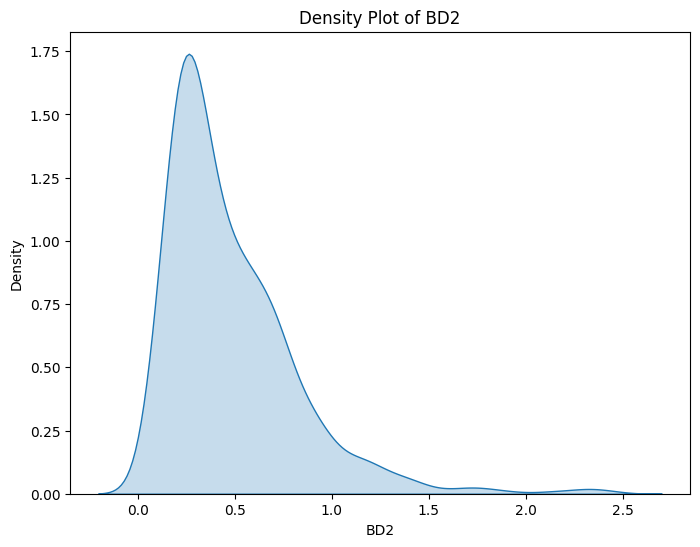

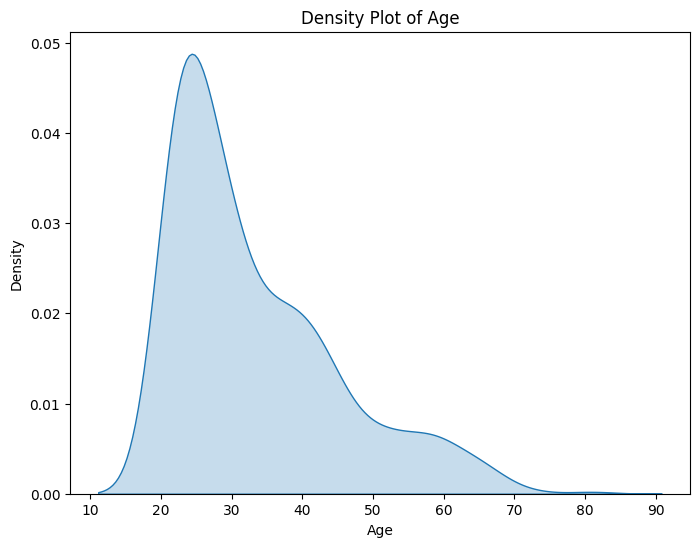

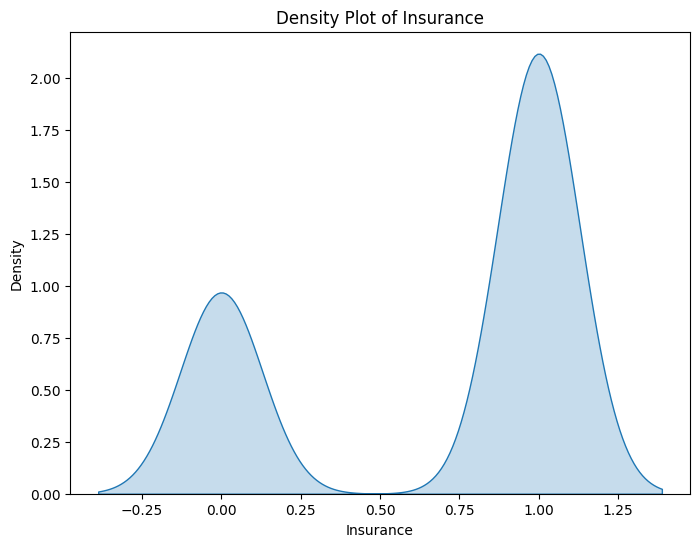

In [ ]:

# Density Plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=data, x=col, fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

## Bivariate

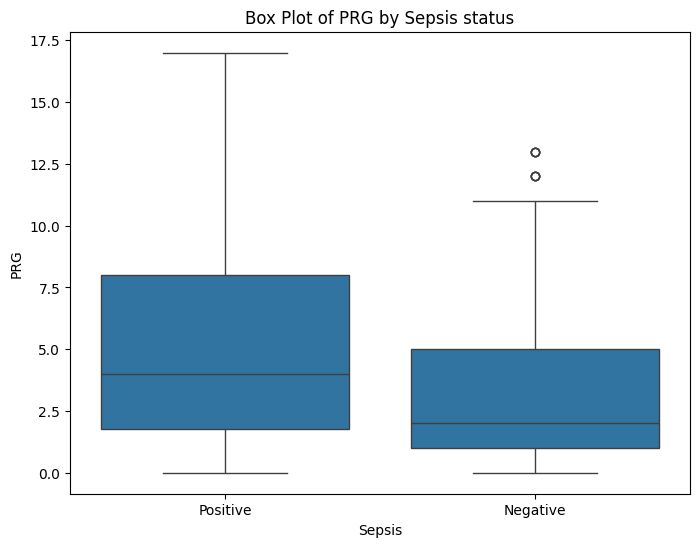

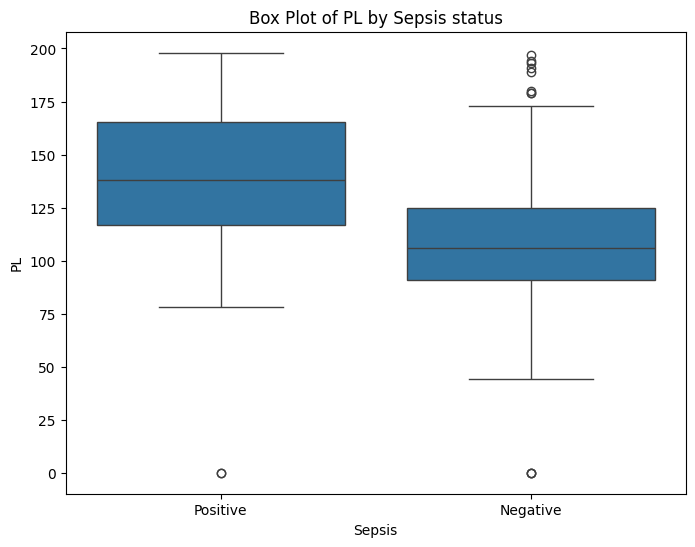

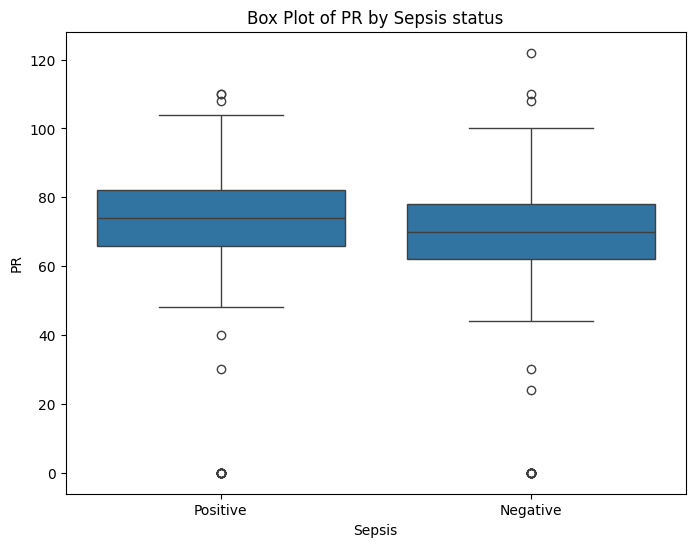

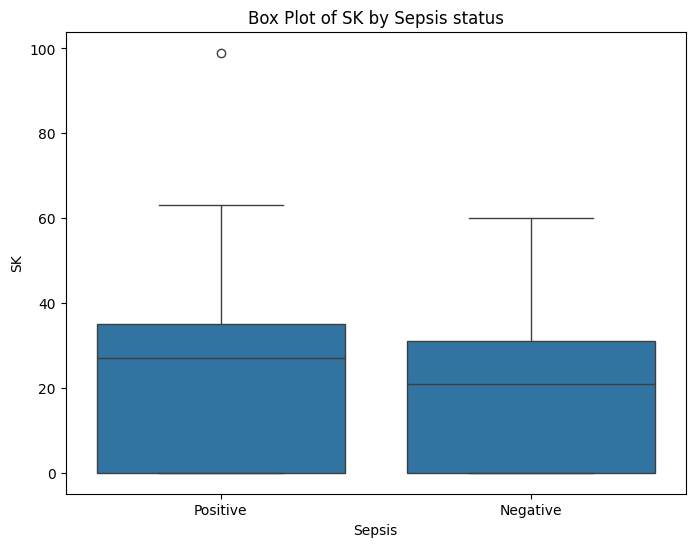

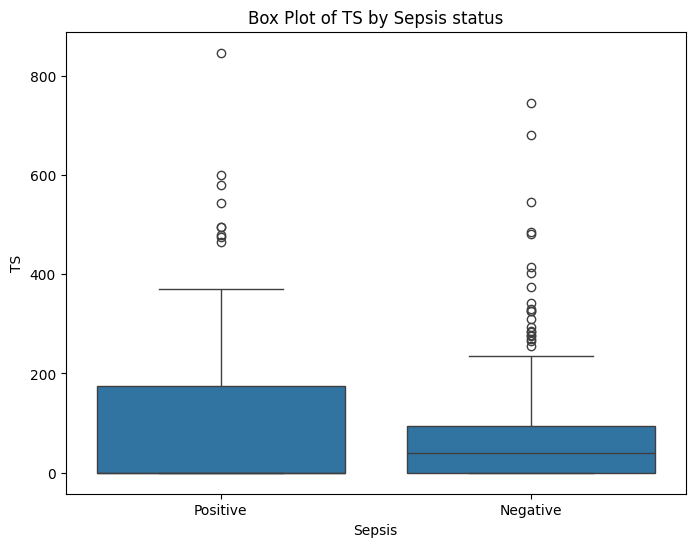

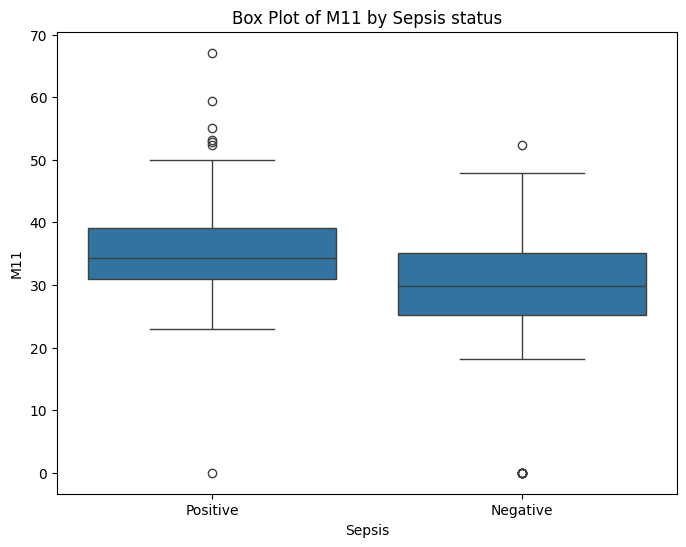

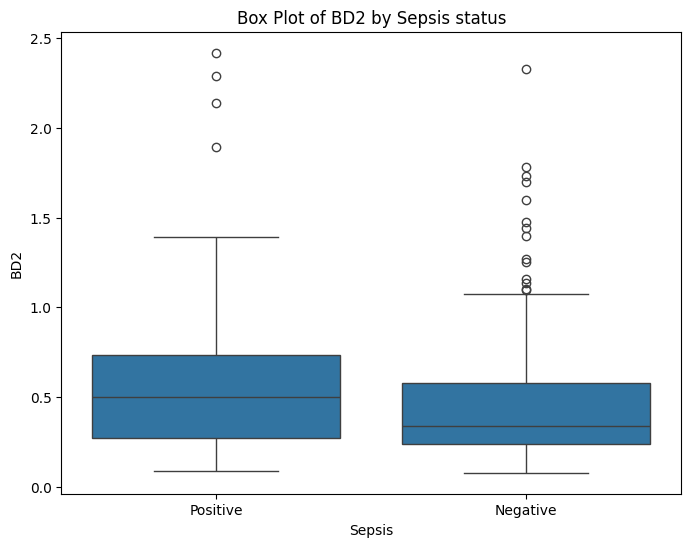

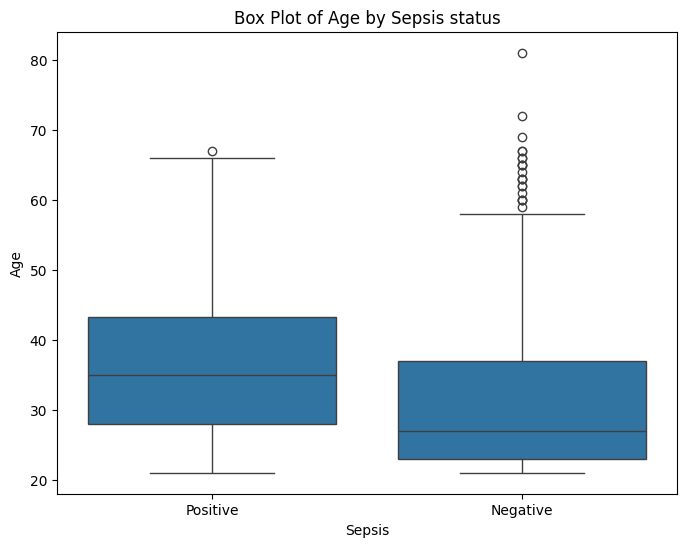

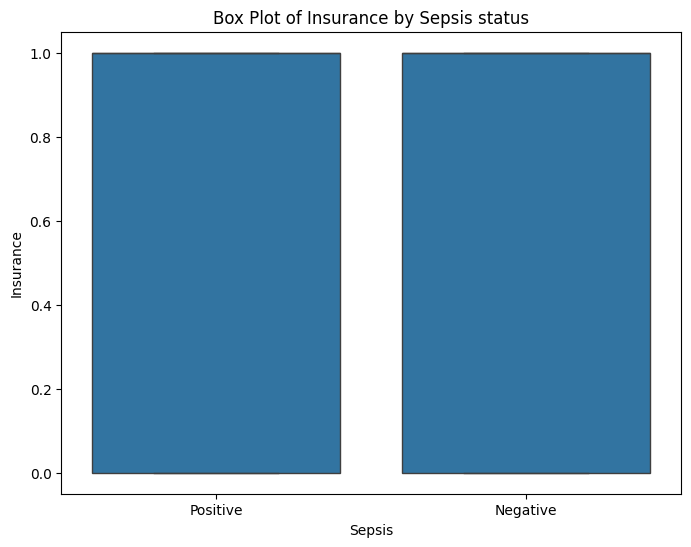

In [ ]:
# Box Plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data['Sepssis'], y=data[col])
    plt.title(f'Box Plot of {col} by Sepsis status')
    plt.xlabel('Sepsis')
    plt.ylabel(col)
    plt.show()


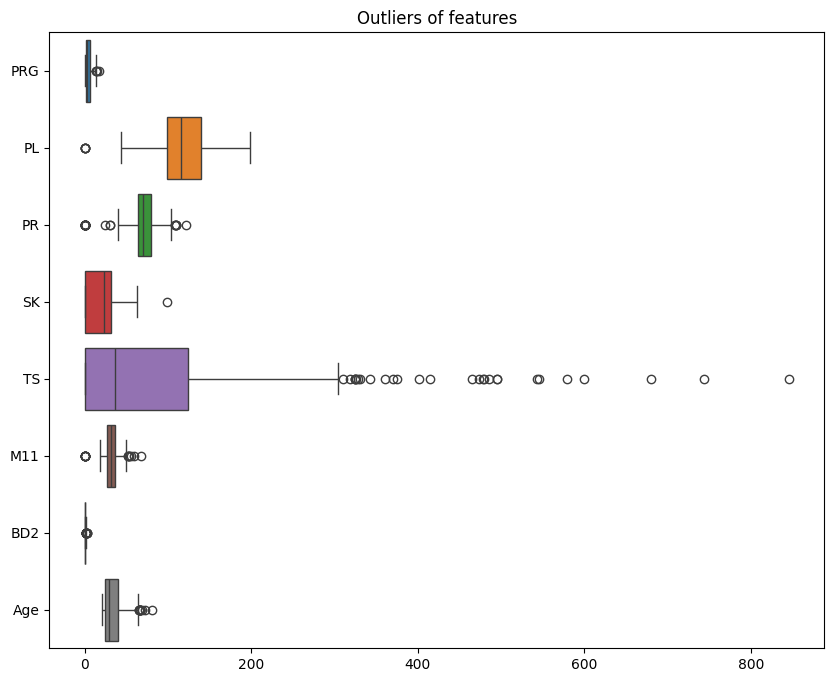

In [ ]:
# check for outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=data.drop(['Insurance','Sepssis'],axis=1), orient='h')
plt.title('Outliers of features')
plt.show()

In [ ]:
data

PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
ID                                                                     
ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
...        ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

[599 rows x 10 columns]

__Analytical Questions__

1. What is the Sepsis rate?

In [ ]:
# Calculate the count of occurrences of sepsis
sepsis_counts = data['Sepssis'].value_counts()

sepsis_counts

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

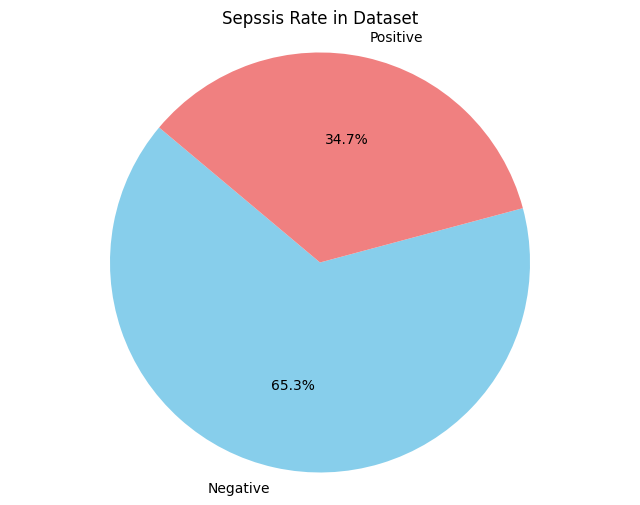

In [ ]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sepsis_counts, labels=['Negative', 'Positive'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Sepssis Rate in Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

2.  How are the numerical variables correlated with each other?

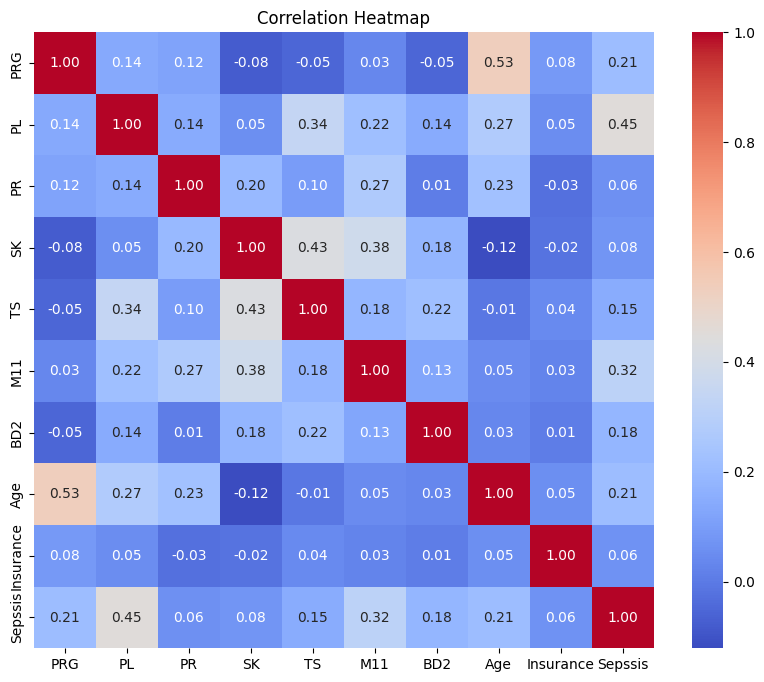

In [ ]:
# convert Sepsis column to numeric column
data["Sepssis"]= data["Sepssis"].apply(lambda x: 1 if x=="Positive" else 0 )

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


3. What is the distribution of ages in the dataset?

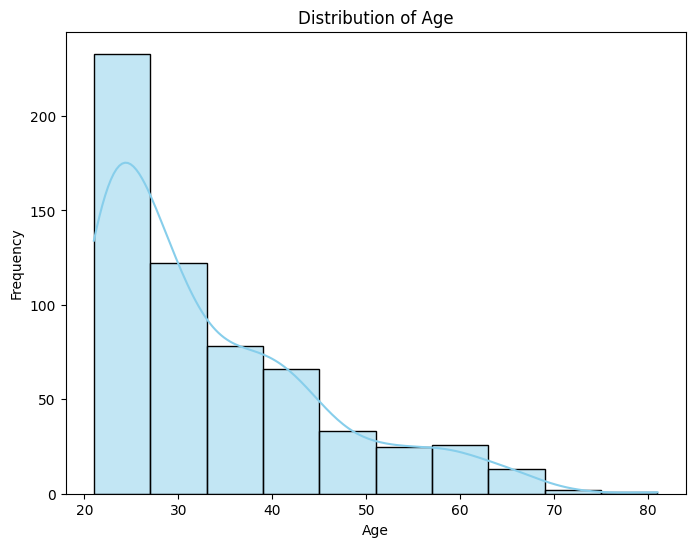

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


4.  How many patients have insurance?

In [ ]:
count_insurance = data['Insurance'].sum()

count_insurance

411

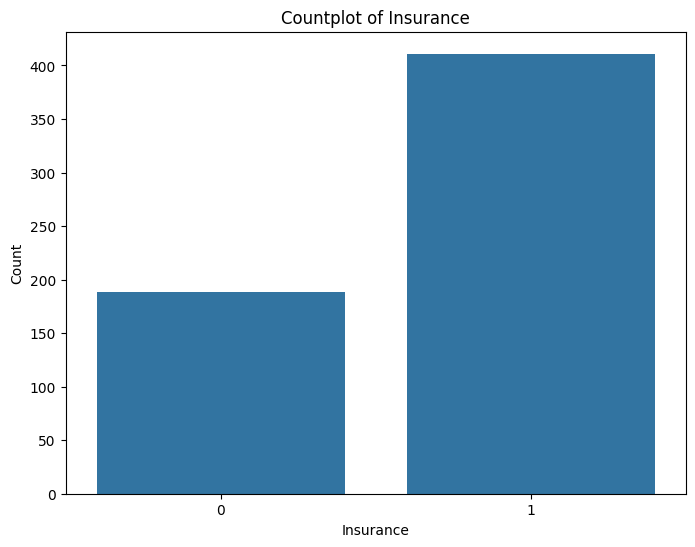

In [ ]:
# visualize
plt.figure(figsize=(8, 6))
sns.countplot(x='Insurance', data=data)
plt.title('Countplot of Insurance')
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.show()


5. How does insurance status relate to the occurrence of Sepsis?

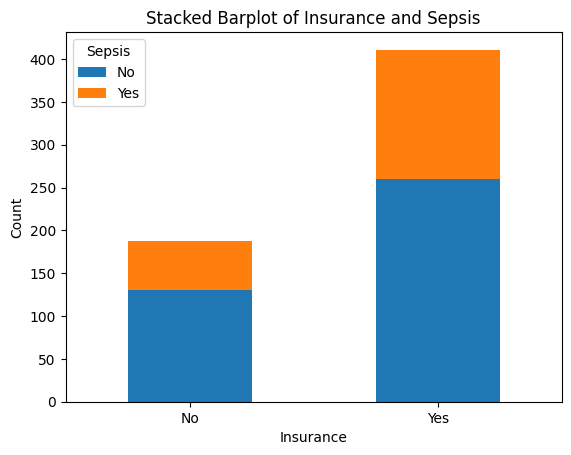

In [ ]:
insurance_sepsis = data.groupby(['Insurance', 'Sepssis']).size().unstack()
insurance_sepsis.plot(kind='bar', stacked=True)
plt.title('Stacked Barplot of Insurance and Sepsis')
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Sepsis', labels=['No', 'Yes'])
plt.show()


6. What is the distribution of plasma glucose concentration (PR) in the dataset?

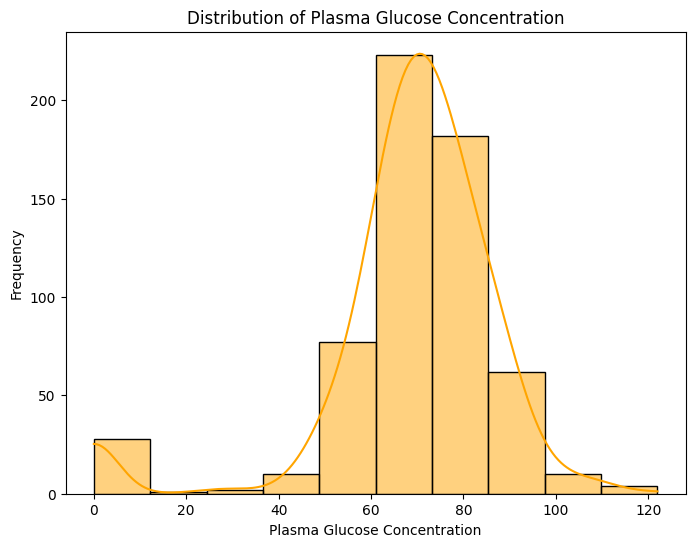

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['PR'], kde=True, bins=10, color='orange')
plt.title('Distribution of Plasma Glucose Concentration')
plt.xlabel('Plasma Glucose Concentration')
plt.ylabel('Frequency')
plt.show()


7. How does serum insulin (M11) vary between patients with and without sepsis?

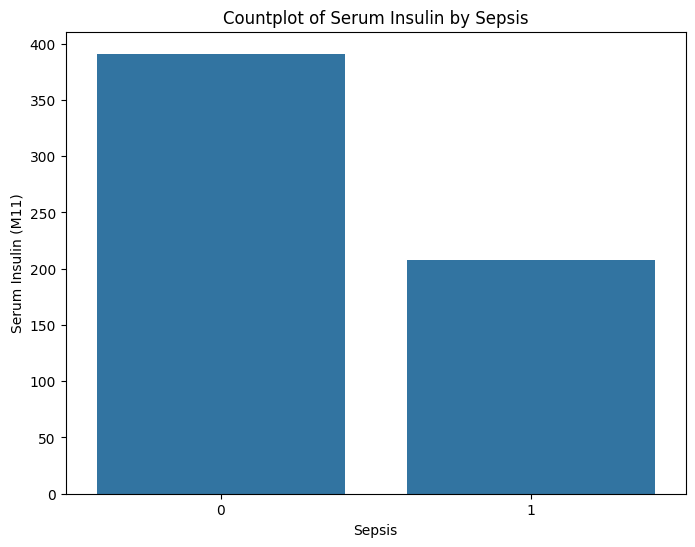

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sepssis',  data=data)
plt.title('Countplot of Serum Insulin by Sepsis')
plt.xlabel('Sepsis')
plt.ylabel('Serum Insulin (M11)')
plt.show()


In [ ]:
data.describe().T

count        mean         std     min     25%      50%      75%  \
PRG        599.0    3.824708    3.362839   0.000   1.000    3.000    6.000   
PL         599.0  120.153589   32.682364   0.000  99.000  116.000  140.000   
PR         599.0   68.732888   19.335675   0.000  64.000   70.000   80.000   
SK         599.0   20.562604   16.017622   0.000   0.000   23.000   32.000   
TS         599.0   79.460768  116.576176   0.000   0.000   36.000  123.500   
M11        599.0   31.920033    8.008227   0.000  27.100   32.000   36.550   
BD2        599.0    0.481187    0.337552   0.078   0.248    0.383    0.647   
Age        599.0   33.290484   11.828446  21.000  24.000   29.000   40.000   
Insurance  599.0    0.686144    0.464447   0.000   0.000    1.000    1.000   
Sepssis    599.0    0.347245    0.476492   0.000   0.000    0.000    1.000   

              max  
PRG         17.00  
PL         198.00  
PR         122.00  
SK          99.00  
TS         846.00  
M11         67.10  
BD2          2.42  
Age         81.00  
Insurance    1.00  
Sepssis      1.00

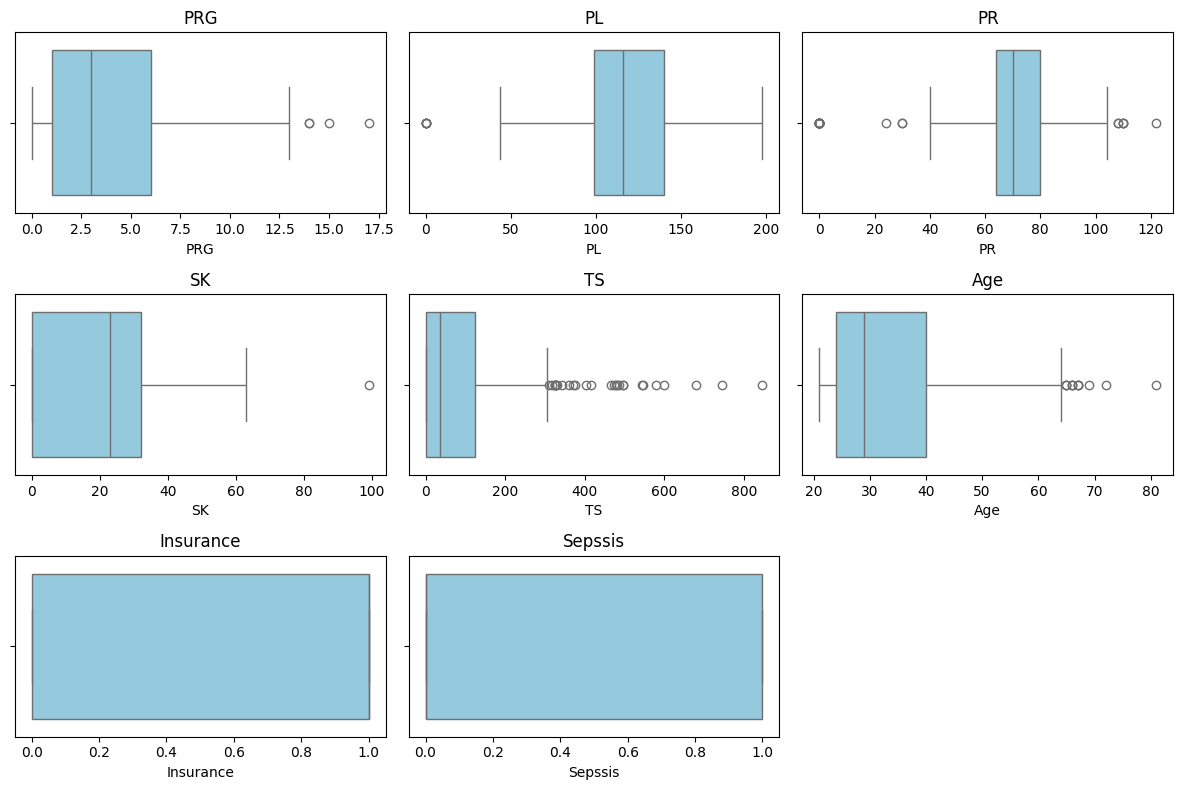

In [ ]:
# Selecting numerical columns
columns = data.select_dtypes(include= 'int' ).columns

# Creating box plots for each numerical variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(column)
plt.tight_layout()
plt.show()


In [ ]:
# Rename a column

data.rename(columns={"Sepssis":"Sepsis"}, inplace=True) 

data

PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance  Sepsis
ID                                                                   
ICU200010    6  148  72  35    0  33.6  0.627   50          0       1
ICU200011    1   85  66  29    0  26.6  0.351   31          0       0
ICU200012    8  183  64   0    0  23.3  0.672   32          1       1
ICU200013    1   89  66  23   94  28.1  0.167   21          1       0
ICU200014    0  137  40  35  168  43.1  2.288   33          1       1
...        ...  ...  ..  ..  ...   ...    ...  ...        ...     ...
ICU200604    6  123  72  45  230  33.6  0.733   34          0       0
ICU200605    0  188  82  14  185  32.0  0.682   22          1       1
ICU200606    0   67  76   0    0  45.3  0.194   46          1       0
ICU200607    1   89  24  19   25  27.8  0.559   21          0       0
ICU200608    1  173  74   0    0  36.8  0.088   38          1       1

[599 rows x 10 columns]

__Hypothesis Testing__

* Null Hypothesis (H0): There is no association between having insurance and the occurrence of sepsis.
* Alternative Hypothesis (H1): There is an association between having insurance and the occurrence of sepsis.

In [ ]:
# Crosstabulation of Insurance and Sepsis
insurance_sepsis_cross_tab = pd.crosstab(data['Insurance'], data['Sepsis'])

insurance_sepsis_cross_tab

Sepsis       0    1
Insurance          
0          131   57
1          260  151

In [ ]:
# Chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(insurance_sepsis_cross_tab)

In [ ]:
# Printing the results
print(f"Chi-square test statistic: {chi2:.2f}")
print(f"p-value: {p_value:.2f}")

Chi-square test statistic: 2.07
p-value: 0.15


In [ ]:
alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to Reject the null hypothesis.")

Fail to Reject the null hypothesis.


 There is no association between having insurance and the occurrence of sepsis.

## DATA PREPARATION

In [ ]:
data.head()

PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance  Sepsis
ID                                                                   
ICU200010    6  148  72  35    0  33.6  0.627   50          0       1
ICU200011    1   85  66  29    0  26.6  0.351   31          0       0
ICU200012    8  183  64   0    0  23.3  0.672   32          1       1
ICU200013    1   89  66  23   94  28.1  0.167   21          1       0
ICU200014    0  137  40  35  168  43.1  2.288   33          1       1

In [ ]:
# check for unique values
data["Sepsis"].unique()

array([1, 0], dtype=int64)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, ICU200010 to ICU200608
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepsis     599 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 67.6+ KB


## MODELING & EVALUATION

Split the dataset into features (X) and the target variable (y).

In [ ]:
X = data.drop(columns= ['Sepsis','Insurance'],axis=1)

y = data['Sepsis']



Spilt data into training and evaluation

In [ ]:
X_test,X_train, y_test,y_train = train_test_split(X,y, test_size=0.2, random_state=42 , stratify =y)

In [ ]:
X_train 

PRG   PL  PR  SK   TS   M11    BD2  Age
ID                                                
ICU200042    3   88  58  11   54  24.8  0.267   22
ICU200162    9  156  86  28  155  34.3  1.189   42
ICU200417    0  101  62   0    0  21.9  0.336   25
ICU200254    2  146  76  35  194  38.2  0.329   29
ICU200172    0  114  80  34  285  44.2  0.167   27
...        ...  ...  ..  ..  ...   ...    ...  ...
ICU200527    7  125  86   0    0  37.6  0.304   51
ICU200104    2  142  82  18   64  24.7  0.761   21
ICU200506    5  110  68   0    0  26.0  0.292   30
ICU200592   12  121  78  17    0  26.5  0.259   62
ICU200446   12  140  85  33    0  37.4  0.244   41

[120 rows x 8 columns]

In [ ]:
y_train

ID
ICU200042    0
ICU200162    1
ICU200417    0
ICU200254    0
ICU200172    0
            ..
ICU200527    0
ICU200104    0
ICU200506    0
ICU200592    0
ICU200446    0
Name: Sepsis, Length: 120, dtype: int64

In [ ]:
features = X.columns

features

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object')

Create preprocessor

In [ ]:
# create preprocessor with transformations to be applied to data
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='median'),features),
        ('scaler', RobustScaler(),features),
        ('log_transformations', FunctionTransformer(np.log1p),features)
    ]
)

create a list of models

In [ ]:
# Define models
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42, probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Tree-based (Decision Tree)', DecisionTreeClassifier(random_state=42)),
    ('stochastic_gradient_descent',SGDClassifier(random_state=42))   
]

In [ ]:
# view nodels
for model_name, model in models:
    print(f'{model_name}')

Random Forest
Logistic Regression
Support Vector Machine
K-Nearest Neighbors
Tree-based (Decision Tree)
stochastic_gradient_descent


__Train Unbalanced Data__

In [ ]:
# create table to store metrics
metrics_table = pd.DataFrame(columns=['Model Name','Precision','Recall','Accuracy','F1_Score'])

# initialize dictionary to store pipelines
pipelines = {}

# loop and train models
for model_name, model in models:
    pipeline= Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature importance',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',model)
    ])

    #fit train data to pipeline
    pipeline.fit(X_train,y_train)

    # make prediction on the test set
    y_pred = pipeline.predict(X_test)

    # store classification report in a dictionary
    metrics = classification_report(y_test, y_pred, output_dict= True)
    
    #save each pipeline in the loop in the dictionary
    pipelines[model_name]= pipeline

    # get values from metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    # add these metric values to the table
    metrics_table.loc[len(metrics_table)] = [model_name,accuracy,precision,recall,f1]

#sort values by f1_score in descending
metrics_table.sort_values('F1_Score',ascending=False)

Model Name  Precision    Recall  Accuracy  F1_Score
1          Logistic Regression   0.749478  0.742944  0.749478  0.743830
0                Random Forest   0.745303  0.740047  0.745303  0.741562
3          K-Nearest Neighbors   0.678497  0.664845  0.678497  0.667688
4   Tree-based (Decision Tree)   0.661795  0.673223  0.661795  0.666145
2       Support Vector Machine   0.659708  0.678093  0.659708  0.537793
5  stochastic_gradient_descent   0.521921  0.604904  0.521921  0.528495

In [ ]:
#view one of the models
pipelines['Logistic Regression']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object')),
                                                 ('scaler', RobustScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object')),
                                                 ('log_transformations',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object'))])),
                ('feature importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x000001DE0F3E71A0>)),
                ('classifier', LogisticRegression(random_state=42))])

__Train Balanced Data__

In [ ]:
# Initialize the folder to save models
model_folder = "models"
os.makedirs(model_folder, exist_ok=True)

# Initialize the table to store metrics
balanced_metrics_table = pd.DataFrame(columns=['Model Name', 'Precision', 'Recall', 'Accuracy', 'F1-Score'])

# Initialize a dictionary to store balanced pipelines
balanced_pipelines = {}

# Loop through models
for model_name, model in models:

    # Create pipeline using ImbPipeline from imblearn
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(sampling_strategy='auto')),
        ('feature importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', model)
    ])

    # Define hyperparameters for grid search
    param_grid = {}
    if model_name == 'Random Forest':
        param_grid = {
            'classifier__n_estimators': [50, 100, 150],
            'classifier__max_depth': [None, 10, 20]
        }
    elif model_name == 'Logistic Regression':
        param_grid = {
            'classifier__C': [0.1, 1, 10]
        }
    elif model_name == 'Support Vector Machine':
        param_grid = {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    elif model_name == 'K-Nearest Neighbors':
        param_grid = {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree']
        }
    elif model_name == 'Decision Tree':
        param_grid = {
            'classifier__max_depth': [None, 10, 20],
            'classifier__min_samples_split': [2, 5, 10]
        }
    elif model_name == 'Stochastic Gradient Descent':
        param_grid = {
            'classifier__loss': ['hinge', 'log', 'modified_huber'],
            'classifier__penalty': ['l2', 'l1', 'elasticnet']
        }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(balanced_pipeline, param_grid, cv=5, scoring='f1_weighted')

    # Fit train data to the pipeline
    grid_search.fit(X_train, y_train)

    # Get the best estimator after tuning
    best_pipeline = grid_search.best_estimator_

    # Save the best pipeline in the models folder
    model_path = os.path.join(model_folder, f'best_{model_name}_model.pkl')
    joblib.dump(best_pipeline, model_path)

    # Make predictions using the test set
    y_pred = best_pipeline.predict(X_test)

    # Store metrics in a dictionary
    balanced_metrics = classification_report(y_test, y_pred, output_dict=True)

    # Save each pipeline in the initialized dictionary
    balanced_pipelines[model_name] = best_pipeline

    # Get values from the balanced metric dictionary
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

    # Add these metric values to the table
    balanced_metrics_table.loc[len(balanced_metrics_table)] = [model_name, precision,recall,accuracy, f1]

#sort values by f1_score in descending
balanced_metrics_table.sort_values('F1-Score',ascending=False)

Model Name  Precision    Recall  Accuracy  F1-Score
0                Random Forest   0.728601  0.738645  0.728601  0.732092
1          Logistic Regression   0.716075  0.732054  0.716075  0.720908
2       Support Vector Machine   0.699374  0.729043  0.699374  0.706111
4   Tree-based (Decision Tree)   0.686848  0.696666  0.686848  0.690576
3          K-Nearest Neighbors   0.670146  0.687222  0.670146  0.675760
5  stochastic_gradient_descent   0.613779  0.660477  0.613779  0.623094